In [2]:
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Output: (60000, 28, 28)
print(train_images.shape)

(60000, 28, 28)


In [4]:
# Output: 60000
print(len(train_labels))

60000


In [5]:
# Output: (10000, 28, 28)
print(test_images.shape)

(10000, 28, 28)


In [6]:

# Output: 1000
print(len(test_labels))

10000


In [7]:
# Output: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)
print(np.unique(train_labels))

[0 1 2 3 4 5 6 7 8 9]


In [8]:
print("Elemento 125:", train_labels[125])

Elemento 125: 2


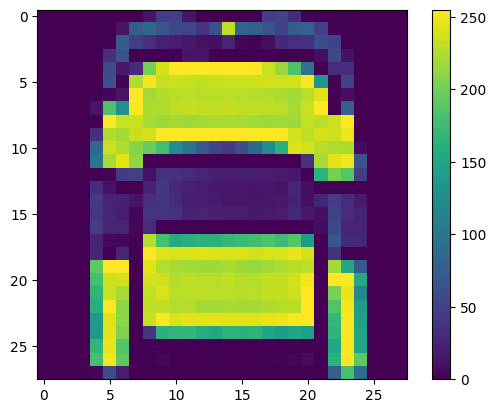

In [9]:
plt.figure()
plt.imshow(train_images[125])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
print("Max value:", max(train_images[125].reshape(784)))
print("Min value:", min(train_images[125].reshape(784)))
print("Elemento 125:", train_images[125])
print("Elemento 125:", train_images[125].reshape(784))

Max value: 255
Min value: 0
Elemento 125: [[  0   0   0   0   0   0   0   0  13  45  48  14   0   0   0   0   0  47
   52  33   1   0   0   1   0   0   0   0]
 [  0   0   0   0   1   0  13  75  84  67  55  55  39  64 230  83  79  66
   51  74  80  49   0   0   0   0   0   0]
 [  0   0   0   0   0   1  74  46  34  23  20  17  11  10  24   4   2   9
   29  35  37  60  51   0   1   0   0   0]
 [  0   0   0   0   0  34  65   0   0   0   0  13  14   0   0   0   0   0
    0   0   0  10  55  11   0   0   0   0]
 [  0   0   0   0   0  58  16  30 202 239 255 255 255 255 255 255 254 234
  216 184  97   0  31  33   0   0   0   0]
 [  0   0   0   0   0  64   0 225 251 233 234 233 232 233 235 234 236 238
  238 239 254 135   0  52   0   0   0   0]
 [  0   0   0   0   0   3  13 255 221 226 229 230 229 229 230 229 227 226
  223 220 229 244   0  10   0   0   0   0]
 [  0   0   0   0  14 184 128 255 224 225 230 232 231 231 232 230 231 230
  229 222 234 255   0  78   0   0   0   0]
 [  0   0   0   0   0 

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [12]:
print("Max value:", max(train_images[125].reshape(784)))
print("Min value:", min(train_images[125].reshape(784)))

x_train = train_images.reshape(60000, 784)
x_test = test_images.reshape(10000, 784)
print("Elemento 125:", train_images[125])
print("Elemento 125:", train_images[125].reshape(784))

Max value: 1.0
Min value: 0.0
Elemento 125: [[0.         0.         0.         0.         0.         0.
  0.         0.         0.05098039 0.17647059 0.18823529 0.05490196
  0.         0.         0.         0.         0.         0.18431373
  0.20392157 0.12941176 0.00392157 0.         0.         0.00392157
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.00392157 0.
  0.05098039 0.29411765 0.32941176 0.2627451  0.21568627 0.21568627
  0.15294118 0.25098039 0.90196078 0.3254902  0.30980392 0.25882353
  0.2        0.29019608 0.31372549 0.19215686 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.00392157
  0.29019608 0.18039216 0.13333333 0.09019608 0.07843137 0.06666667
  0.04313725 0.03921569 0.09411765 0.01568627 0.00784314 0.03529412
  0.11372549 0.1372549  0.14509804 0.23529412 0.2        0.
  0.00392157 0.         0.         0.        ]
 [0.         0.         0.     

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10, activation='softmax')
])

C:\Users\j.b.sanchez.martinez\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, batch_size=64, epochs=10)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7899 - loss: 0.6009
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8648 - loss: 0.3726
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8766 - loss: 0.3322
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8887 - loss: 0.3028
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8957 - loss: 0.2822
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9014 - loss: 0.2670
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9062 - loss: 0.2541
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9139 - loss: 0.2327
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9129 - loss: 0.2282
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9176 - loss: 0.2181


In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=0)

print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)


Test loss: 0.32857537269592285

Test accuracy: 0.883400022983551


In [17]:
predictions = np.round(model.predict(test_images), 2)
print(predictions[98])
print(np.argmax(predictions[98]))

print(test_labels[98])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[0.   0.   0.42 0.   0.47 0.   0.1  0.   0.   0.  ]
4
4


In [18]:
model.save('fashion_mnist.keras')